In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB,BernoulliNB
from sklearn.neural_network import MLPClassifier
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.utils import resample
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score,recall_score,precision_score
import missingno as mns
import nltk
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import re
nltk.download('stopwords')
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lucky\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [2]:
df  = pd.read_csv('Tweets.csv')
df.head()

tweet_id airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513           neutral                        1.0000   
1  570301130888122368          positive                        0.3486   
2  570301083672813571           neutral                        0.6837   
3  570301031407624196          negative                        1.0000   
4  570300817074462722          negative                        1.0000   

  negativereason  negativereason_confidence         airline  \
0            NaN                        NaN  Virgin America   
1            NaN                     0.0000  Virgin America   
2            NaN                        NaN  Virgin America   
3     Bad Flight                     0.7033  Virgin America   
4     Can't Tell                     1.0000  Virgin America   

  airline_sentiment_gold        name negativereason_gold  retweet_count  \
0                    NaN     cairdin                 NaN              0   
1                    NaN    jnardino                 NaN              0   
2                    NaN  yvonnalynn                 NaN              0   
3                    NaN    jnardino                 NaN              0   
4                    NaN    jnardino                 NaN              0   

                                                text tweet_coord  \
0                @VirginAmerica What @dhepburn said.         NaN   
1  @VirginAmerica plus you've added commercials t...         NaN   
2  @VirginAmerica I didn't today... Must mean I n...         NaN   
3  @VirginAmerica it's really aggressive to blast...         NaN   
4  @VirginAmerica and it's a really big bad thing...         NaN   

               tweet_created tweet_location               user_timezone  
0  2015-02-24 11:35:52 -0800            NaN  Eastern Time (US & Canada)  
1  2015-02-24 11:15:59 -0800            NaN  Pacific Time (US & Canada)  
2  2015-02-24 11:15:48 -0800      Lets Play  Central Time (US & Canada)  
3  2015-02-24 11:15:36 -0800            NaN  Pacific Time (US & Canada)  
4  2015-02-24 11:14:45 -0800            NaN  Pacific Time (US & Canada)

In [3]:
df.isnull().sum().sort_values(ascending=False)

negativereason_gold             14608
airline_sentiment_gold          14600
tweet_coord                     13621
negativereason                   5462
user_timezone                    4820
tweet_location                   4733
negativereason_confidence        4118
tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
airline                             0
name                                0
retweet_count                       0
text                                0
tweet_created                       0
dtype: int64

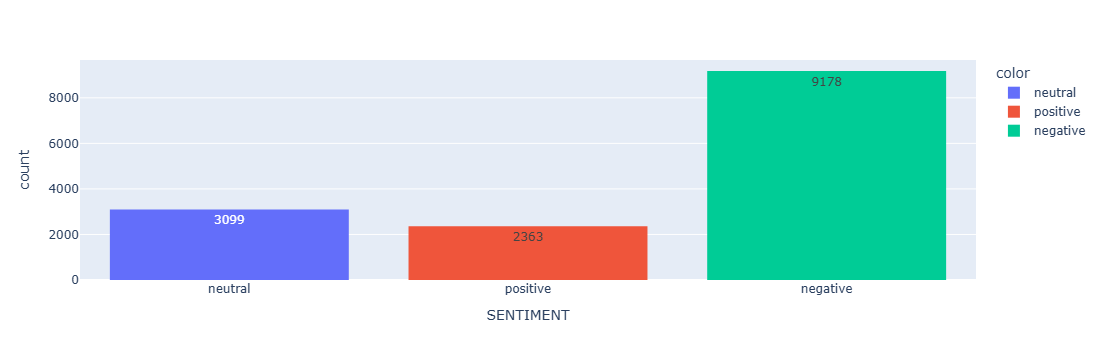

In [4]:
px.histogram(x = df['airline_sentiment'], text_auto=True,labels={'x':'SENTIMENT','y':'OUTCOME'},color=df['airline_sentiment'])

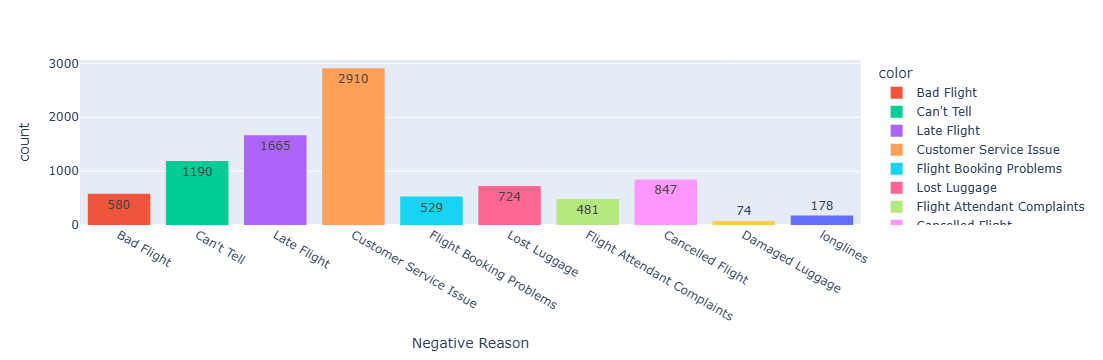

In [10]:
px.histogram(x = df['negativereason'], text_auto=True,labels={'x':'Negative Reason','y':' Sentiment OUTCOME'},color=df['negativereason'])

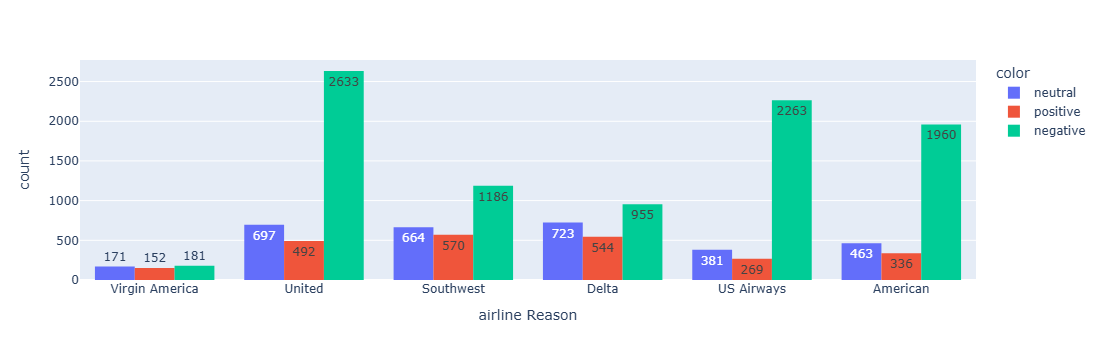

In [23]:
px.histogram(x = df['airline'], text_auto=True,labels={'x':'airline Reason','y':'OUTCOME'},color=df['airline_sentiment'], barmode='group')

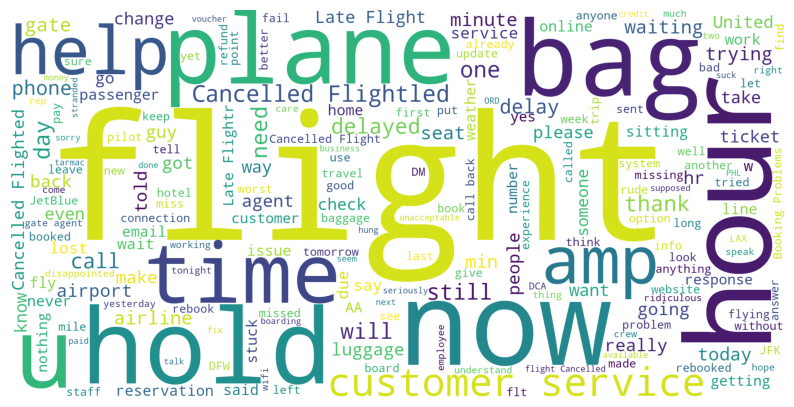

In [24]:
new_data= df[df['airline_sentiment']== 'negative']
words= ' '.join(new_data['text'] )
clw=' '.join([word for word in words.split() if 'http' not in word and not word.startswith('@') and word !='RT'])
wc =WordCloud(stopwords=STOPWORDS, background_color='white', width=2000, height =1000).generate(clw)
plt.figure(1, figsize=(10,10))
plt.imshow(wc)
plt.axis('off')
plt.show()

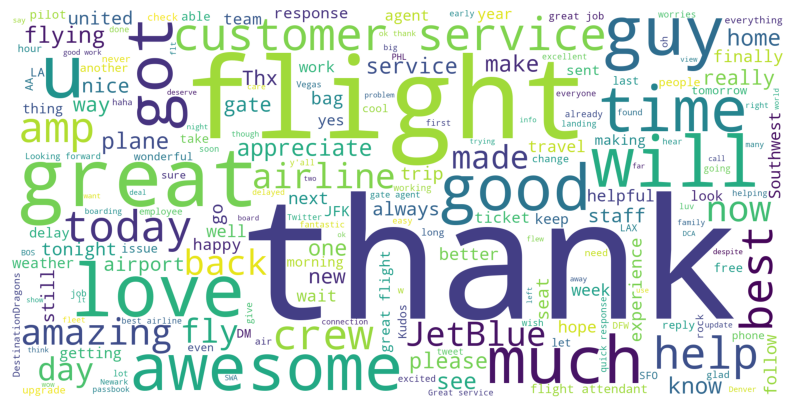

In [27]:
new_data= df[df['airline_sentiment']== 'positive']
words= ' '.join(new_data['text'] )
clw=' '.join([word for word in words.split() if 'http' not in word and not word.startswith('@') and word !='RT'])
wc =WordCloud(stopwords=STOPWORDS, background_color='white', width=2000, height =1000).generate(clw)
plt.figure(1, figsize=(10,10))
plt.imshow(wc)
plt.axis('off')
plt.show()

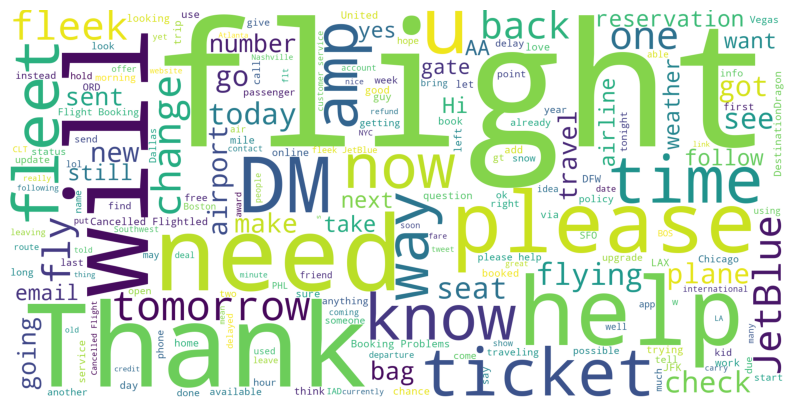

In [26]:
new_data= df[df['airline_sentiment']== 'neutral']
words= ' '.join(new_data['text'] )
clw=' '.join([word for word in words.split() if 'http' not in word and not word.startswith('@') and word !='RT'])
wc =WordCloud(stopwords=STOPWORDS, background_color='white', width=2000, height =1000).generate(clw)
plt.figure(1, figsize=(10,10))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [28]:
df['airline_sentiment'].value_counts()

airline_sentiment
negative    9178
neutral     3099
positive    2363
Name: count, dtype: int64

In [34]:
df1 =df[df['airline_sentiment']=='negative']
df2 =df[df['airline_sentiment']=='positive']
df3 =df[df['airline_sentiment']=='neutral']

df2_sam=resample(df2,n_samples=9178)
df3_sam=resample(df3,n_samples=9178)
df=pd.concat([df1,df2_sam,df3_sam])
df=df.sample(frac=1)
df['airline_sentiment'].value_counts()

airline_sentiment
negative    9178
neutral     9178
positive    9178
Name: count, dtype: int64

In [42]:
def cleantext(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # Remove @mentions
    text = re.sub(r'#', '', text)# remove the # symbol
    text = re.sub(r'RT[\s]+', '', text) #removes RT or retweet
    text = re.sub('https?\/\/\s+','',text)#removes any hyperlink or url links
    text = re.sub('\\n','',text)#removes \nstring
    text = re.sub(r'#[A-Za-z0-9]+','',text)#removes any string with #
    text = re.sub(':','',text) #removes column
    return text
df['text']=df['text'].apply(cleantext)
df['text'].head()

<>:5: SyntaxWarning:

invalid escape sequence '\/'

<>:5: SyntaxWarning:

invalid escape sequence '\/'

C:\Users\lucky\AppData\Local\Temp\ipykernel_25144\962632040.py:5: SyntaxWarning:

invalid escape sequence '\/'



9932      and after six hours even the gate agent got f...
6357      Today is going to be the day, I can feel it! ...
11675     so i ask for ice and the attendant snaps "i d...
12151     When will the old 777-200 fly ORD-PVG get upg...
10497    , another hour gone &amp; they sit with more s...
Name: text, dtype: object

In [45]:
model1=Pipeline([('vectorize',CountVectorizer()),('transformer',TfidfTransformer()),('algo', BernoulliNB())])
model2=Pipeline([('vectorize',CountVectorizer()),('transformer',TfidfTransformer()),('algo', MultinomialNB())])
model3=Pipeline([('vectorize',CountVectorizer()),('transformer',TfidfTransformer()),('algo', MLPClassifier(hidden_layer_sizes=(10,10)))])

In [47]:
x=df.text
y=df['airline_sentiment']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2, random_state=1)

In [48]:
model1.fit(xtrain,ytrain)

Pipeline(steps=[('vectorize', CountVectorizer()),
                ('transformer', TfidfTransformer()), ('algo', BernoulliNB())])

              precision    recall  f1-score   support

    negative       0.87      0.80      0.83      1840
     neutral       0.84      0.82      0.83      1851
    positive       0.83      0.91      0.87      1816

    accuracy                           0.85      5507
   macro avg       0.85      0.85      0.84      5507
weighted avg       0.85      0.85      0.84      5507

0.8451062284365353
0.8460620082055105
0.8451062284365353
0.8444610516919353


<Axes: >

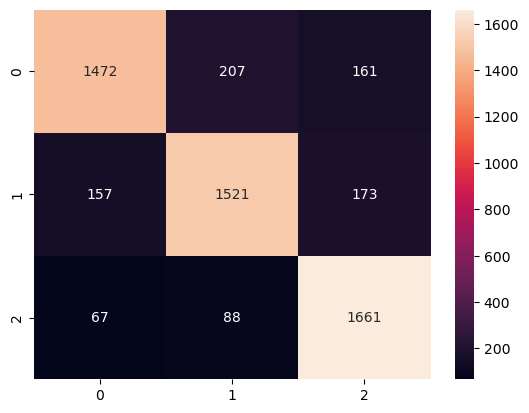

In [54]:
pred1=model1.predict(xtest)
print(classification_report(ytest,pred1))
print(accuracy_score(ytest,pred1))
print(precision_score(ytest,pred1, average='weighted'))
print(recall_score(ytest,pred1, average='weighted'))
print(f1_score(ytest,pred1,average='weighted'))
sns.heatmap(confusion_matrix(ytest, pred1),annot=True, fmt='0.5g')

In [56]:
model2.fit(xtrain,ytrain)

Pipeline(steps=[('vectorize', CountVectorizer()),
                ('transformer', TfidfTransformer()),
                ('algo', MultinomialNB())])

              precision    recall  f1-score   support

    negative       0.84      0.87      0.85      1840
     neutral       0.86      0.81      0.83      1851
    positive       0.88      0.90      0.89      1816

    accuracy                           0.86      5507
   macro avg       0.86      0.86      0.86      5507
weighted avg       0.86      0.86      0.86      5507

0.8592700199745779
0.8594360158513419
0.8592700199745779
0.8589587123099903


<Axes: >

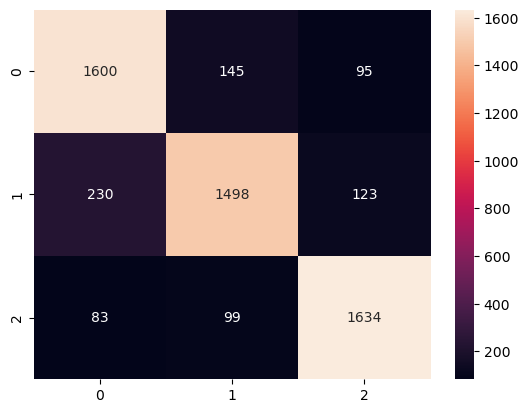

In [57]:
pred2=model2.predict(xtest)
print(classification_report(ytest,pred2))
print(accuracy_score(ytest,pred2))
print(precision_score(ytest,pred2, average='weighted'))
print(recall_score(ytest,pred2, average='weighted'))
print(f1_score(ytest,pred2,average='weighted'))
sns.heatmap(confusion_matrix(ytest, pred2),annot=True, fmt='0.5g')

In [58]:
model3.fit(xtrain,ytrain)

Pipeline(steps=[('vectorize', CountVectorizer()),
                ('transformer', TfidfTransformer()),
                ('algo', MLPClassifier(hidden_layer_sizes=(10, 10)))])

              precision    recall  f1-score   support

    negative       0.96      0.83      0.89      1840
     neutral       0.88      0.96      0.92      1851
    positive       0.94      0.98      0.96      1816

    accuracy                           0.92      5507
   macro avg       0.92      0.92      0.92      5507
weighted avg       0.92      0.92      0.92      5507

0.9224623206827673
0.924854141901209
0.8592700199745779
0.9216051867081696


<Axes: >

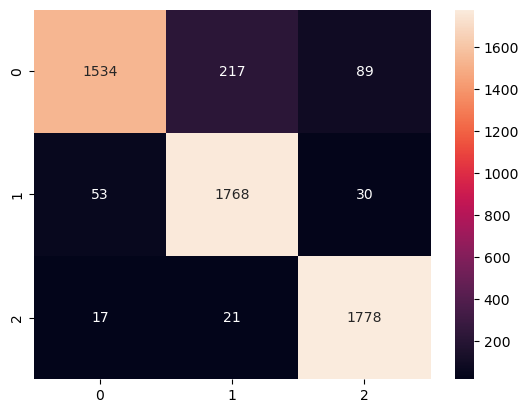

In [59]:
pred3=model3.predict(xtest)
print(classification_report(ytest,pred3))
print(accuracy_score(ytest,pred3))
print(precision_score(ytest,pred3, average='weighted'))
print(recall_score(ytest,pred2, average='weighted'))
print(f1_score(ytest,pred3,average='weighted'))
sns.heatmap(confusion_matrix(ytest, pred3),annot=True, fmt='0.5g')